# Notebook 2: Logistic regression

This notebook will train the user data on spotify using the Logistic regression model. To get a better understanding of what the data looks like, refer to *Notebook 1*.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import linear_model

In [4]:
data = pd.read_csv('processed_data.csv')

In [5]:
cols = list(data.columns)

In [6]:
cols

['Unnamed: 0',
 'duration_ms',
 'key',
 'loudness',
 'tempo',
 'acousticness',
 'danceability',
 'instrumentalness',
 'liveness',
 'mode',
 'speechiness',
 'valence',
 'target']

The columns `Unnamed 0` and `target` are not needed 

In [7]:
cols.pop(0)
cols.remove('target')

In [8]:
X = data[cols]
y = data['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
model = linear_model.LogisticRegression()

train the model

In [11]:
model.fit(X_train, y_train)

LogisticRegression()

Compute outputs for test set

In [12]:
y_pred = model.predict(X_test)

Compute precision fot test set

In [13]:
precision = model.score(X_test, y_test)

In [14]:
precision*100

61.98019801980198

For classification tasks, it is important to also consider the precision, recall, and evetually draw the confusion matrix for the given results

In [15]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual User preference'], colnames=['Model prediction'])

<AxesSubplot:xlabel='Model prediction', ylabel='Actual User preference'>

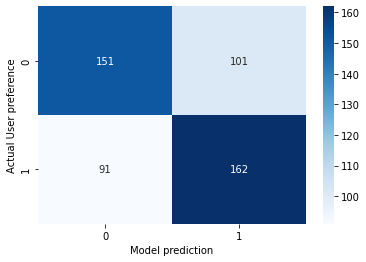

In [16]:
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')

**Reminder**: The confusion matrix contains the following values

$$\begin{bmatrix} True Negatives & False Positives \\ False Negatives & True Negatives \end{bmatrix}$$

Notice how the number for **False Negativs** is high, meaning that the *model is flagging tracks as unlikable when the user actually liked them*.

$$
Precision = \frac{TP}{TP + FP}
$$

$$
Recall = \frac{TP}{TP + FN}
$$

$$
F_1 = \frac{2TP}{2TP + FP + FN}
$$

Compute the F1-score relative to the first class `0`.

In [17]:
TP, FP = confusion_matrix[0]
FN, TN = confusion_matrix[1]

In [18]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2*TP / (2*TP + FP + FN)

In [19]:
print("Precision = {:.2f}\nRecall = {:.2f}\nF1 = {:.2f}".format(precision, recall, F1))

Precision = 0.62
Recall = 0.60
F1 = 0.61


In order to achieve standardised results for a better comparaison between the different algorithms, we'll be using the `classification_report` function provided in `sklearn.metrics`.

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       252
           1       0.62      0.64      0.63       253

    accuracy                           0.62       505
   macro avg       0.62      0.62      0.62       505
weighted avg       0.62      0.62      0.62       505

